<a href="https://colab.research.google.com/github/Echevarriaj93/gradwork2022/blob/main/Jose_Echevarria_WebScraping_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping - Getting Started

We all know the Internet might be the greatest and all-inclusive resource for data on the planet. However, collecting data fro the web (Internet) might not be as *easy* as you thought. 

Some websites provide Application Programming Interfaces (APIs), or already have there data packaged in a downloadable format (e.g., `csv` or `tsv`), but most of them don't. So for the latter, you need to build your own tool to **scrape** data from them.

## How does web scraping work?

Web scraping, as the name suggests, refer to the process where we send a request to the server hosting a web page (a web page is a part of a web site) we specified. Then the server will respond one of two things#

- If everything checks out, the server *should* return the **source code** of the web page (or multiple pages), so that we can extract the data of interest from;
- If there is some error (e.g., security, non-existent page, server down), the server *should* return some **error code** so that we know what went wrong. 

### Is it legal to scrape the web?

Unfortunately there is no cut-and-dry answer to this question. The general rule is if you do not need to **log in** to see the data, you should be able to scrape it. If you do need to log in, make sure you read the **user agreement** to see if they allow you to scrape their data.

That being said, a lot of the websites (Amazon and Zillow, I am looking at you two) will make it very difficult to scrape from. They will ban your IP address so you cannot make a connection to their website, or the source code of their webpages is disguised so well so you cannot find the required information from them. In these events, maybe resort to a different strategy.

### Web Scraping in a Nutshell

Imagine we want to retrieve all the data from a table on a web page, we should:     

1. Identify the **URL** of the web page that we want to retrieve data from;
2. Identify the **table** (start and end point) on the web page;
3. Request the **content** (source code) from the server by the URL;
4. Download the content if it is returned by the server;
5. Identify the elements on the page to locate the **table**;
6. Extract and reformat (if needed) the data from the table into a dataset (e.g., a `Pandas DataFrame`) so we can use it.

Note that steps 1 - 2 are manual, and 3 - 6 are usually done using code. **Python** is a good choice when writing web scraping codes.

## Why Python?

Python is the most popular language used in scraping for a few reasons:     

- Python is easy to learn - and lots of online resources;
- Python has quite a few packages that specialize in web scraping;
- You can store scraped data in various data formats.


### How can you scrape web data using Python?

As said above, Python has quite a few packages that are specialized in web scraping. Below is a table summarizing the main Python packages.

**Table 1. Overview of Python Web Scraping Tools**

| |  requests | beautifulSoup | lxml | selenium |
| - |--------- | ------------- | ---- | --------- |
| **Mechanism** | HTTP Requests | Parsing | Parsing | HTTP Requests | 
| **Ease of Use** | High | High | Medium | Medium |
| **Speed** | Fast | Fast | Very Fast | Slow |
| **Skill level** | Beginner | Beginner | Intermediate | Expert |
| **Working with** | HTML | HTML | HTML, JSON |HTML, JavaScript |
| **Project Scope** | Small to Large | Small to Large | Small to Large | Small |
| **Document & Tutorials** | Excellent | Excellent | Good | Good | 




## Background: The components of a web page

Before we start writing code, we need to understand a little bit about the **structure** of a web page. We'll use the site's structure to write code that gets us the data we want to scrape, so understanding that structure is an important first step for any web scraping project.

When we visit a web page, our web browser makes a request to a web server. This request is called a GET request, since we’re getting files from the server. The server then sends back files that tell our browser how to render the page for us. These files will typically include:
- [HTML](https://www.w3.org/TR/html/) — the main content of the page.
- [CSS](https://developer.mozilla.org/en-US/docs/Web/CSS) — used to add styling to make the page look nicer.
- [JS](https://developer.mozilla.org/en-US/docs/Web/JavaScript) — Javascript files add interactivity to web pages.
- Images — image formats, such as [JPG](https://en.wikipedia.org/wiki/JPEG) and [PNG](https://en.wikipedia.org/wiki/Portable_Network_Graphics), allow web pages to show pictures.

### HTML

HyperText Markup Language (HTML) is the language that web pages are created in. HTML isn’t a programming language, like Python, though. It’s a markup language that tells a browser how to display content. 

HTML has many functions that are similar to what you might find in a word processor like Microsoft Word — it can make text bold, create paragraphs, and so on.

HTML consists of elements called tags. The most basic tag is the `<html>` tag. This tag tells the web browser that everything inside of it is HTML. We can make a simple HTML document just using this tag:
```html
<html>
</html>
```
Right inside an html tag, we can put two other tags: the `head` tag, and the `body` tag.

The main content of the web page goes into the `body` tag. The `head` tag contains data about the title of the page, and other information that generally isn’t useful in web scraping:
```html
<html>
<head>
</head>
<body>
</body>
</html>
```
You may have noticed above that we put the `head` and `body` tags inside the `html` tag. In HTML, tags are nested, and can go inside other tags.

We’ll now add our first content to the page, inside a `p` tag. The `p` tag defines a paragraph, and any text inside the tag is shown as a separate paragraph:

```html
<html>
<head>
</head>
<body>
<p>
Here's a paragraph of text!
</p>
<p>
Here's a second paragraph of text!
</p>
</body>
</html>
```

### HTML tags are Tree based

- The first tag (usually `<html>`) is called __root__
- The other tags are __children__ or __siblings__, as discussed below

#### Other Tags & Concepts in HTML

Tags have commonly used names that depend on their position in relation to other tags:

- child — a child is a tag **inside** another tag. So the two `p` tags above are both children of the `body` tag.
- parent — a parent is the tag another tag is **inside**. Above, the `html` tag is the parent of the body tag.
- sibiling — a sibiling is a tag that is **nested inside** the same parent as another tag. For example, `head` and `body` are siblings, since they’re both inside html. Both `p` tags are siblings, since they’re both inside body.

We can also add properties to HTML tags that change their behavior. Below, we'll add some extra text and hyperlinks using the `a` tag.

```html
<html>
<head>
</head>
<body>
<p>
Here's a paragraph of text!
<a href="https://www.dataquest.io">Learn Data Science Online</a>
</p>
<p>
Here's a second paragraph of text!
<a href="https://www.python.org">Python</a> </p>
</body></html>
```

In the above example, we added two `a` tags. `a` tags are links, and tell the browser to render a link to another web page. The href property of the tag determines where the link goes.

`a` and `p` are extremely common html tags. Here are a few others:

- `div` — indicates a division, or area, of the page.
- `b` — bolds any text inside.
- `i` — italicizes any text inside.
- `table` — creates a table.
- `form` — creates an input form.
For a full list of tags, check out [this link](https://developer.mozilla.org/en-US/docs/Web/HTML/Element).



#### Properties of HTML Tags

Before we move into actual web scraping, let’s learn about the *class* and *id* properties. These **special** properties give HTML elements names, and make them easier to interact with when we’re scraping.

One element can have multiple classes, and a class can be shared between elements. Each element can only have one id, and an id can only be used once on a page. Classes and ids are optional, and not all elements will have them.

We can add classes and ids to our example:
```html
<html>
<head>
</head>
<body>
<p class="bold-paragraph">
Here's a paragraph of text!
<a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
</p>
<p class="bold-paragraph extra-large">
Here's a second paragraph of text!
<a href="https://www.python.org" class="extra-large">Python</a>
</p>
</body>
</html>
```

The properties would change the appearance, but they are very important for us to **locate** certain elements on a HTML page.

Typically, we use `id` and `class` to locate a certain element (e.g., `div` or `p`) on a webpage. For example for the webpage like below:
```html
<html>
<head>
</head>
<body>
<div class = "I-am-div-1" id = "this-is-id-1">
some text
</div>
<div class = "I-am-div-2" id = "this-is-id-2">
some other text
</div>
</body>
</html>
```



## Python Packages for Scraping

We mainly us two packages for web scraping using Python, namely:
- `requests`: download the webpage (all contents in `HTML` code)
- `BeautifulSoup` (`bs4`): an `HTML` wrapper use to parse and analyze the HTML code.

Other noteable packages:
- `pandas`: used to store the data retrieved from the scraped.
- `datetime`: use to handle dates and timestamps.
- `pickle`: save data 

In [ ]:
import requests
from bs4 import BeautifulSoup
# import pandas as pd

### How `requests` work

`requests` can retrieve any webpage given the URL of the page. URL is the unique name of the webpage on the internet. You can go to the **address bar** in your browser to copy the URL of the webpage you are visiting. Take the following URL as an example:
```
https://books.toscrape.com/catalogue/category/books/mystery_3/index.html
```
- The first part (`https://books.toscrape.com/`) is a domain name, identifies a website. 
- The second part (`catalogue/category/books/mystery_3/`) is a path - which is a part of the website. 
- The third part (`index.html`) identifies a certain webpage. 

Sometimes, there are __paramters__ (usually search based) in the URL. Take this one as an example:
```html
https://www.higheredjobs.com/admin/search.cfm?JobCat=37&StartRow=1&SortBy=1&NumJobs=100&filterby=&CatType=
```

- The question mark (`?`) in the URL passes parameters to the URL (different parameters are connected using `&` if there is multiple):
  + `JobCat=37`: according to HigherEdJobs, `37` refers to **Communications, Marketing, and Public Affairs**;
  + `StartRow=1`: according to HigherEdJobs, this means it starts from the **first** record;
  + `filterby=`: this is a **empty** parameter - which takes no effect. Suppose you do apply any filter on the webpage there will be a value here.

**PRO-TIPs**:
1. Even for empty parameters, you should not ignore them in your code;
2. We typically create variables for parameter values, e.g., `37` and `1`.

In [ ]:
#### this is an example
url = 'https://books.toscrape.com/index.html'

In [ ]:
response = requests.get(url)
response

<Response [200]>

You should investigate the `response` object, if you get `[200]` that means your request did **not** get rejected by the server, which means we can move on.

If you get any error (not `[200]`), you can check what happened using:

In [ ]:
#### if you have any error
#### 'OK' means no error
response.reason

'OK'

Again, if you get something like `not found`, it's usually a problem with the URL.

Another thing you need to check is that if you get the webpage you actually wanted, since a lot of the websites are against web scraping, so even though `requests` returned something, you do not know if that is what you wanted.

You will need the help of `BeautifulSoup`, which can be used to display the contents of the page you retrieved, via `response.text`.

Then we can use `BeautifulSoup` to parse what we downloaded an take a look.

__PRO-TIPs__: 
1. note we use the `html.parser` in this example, other popular parsers include `lxml` and `html5lib`.
2. we use `.prettify()` to make the downloaded more readable.

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")
print(soup.prettify())

In this case looks like we got the page we want - you can verify this by using "inspect" or "show page source" using your browser (Google Chrome recommended).



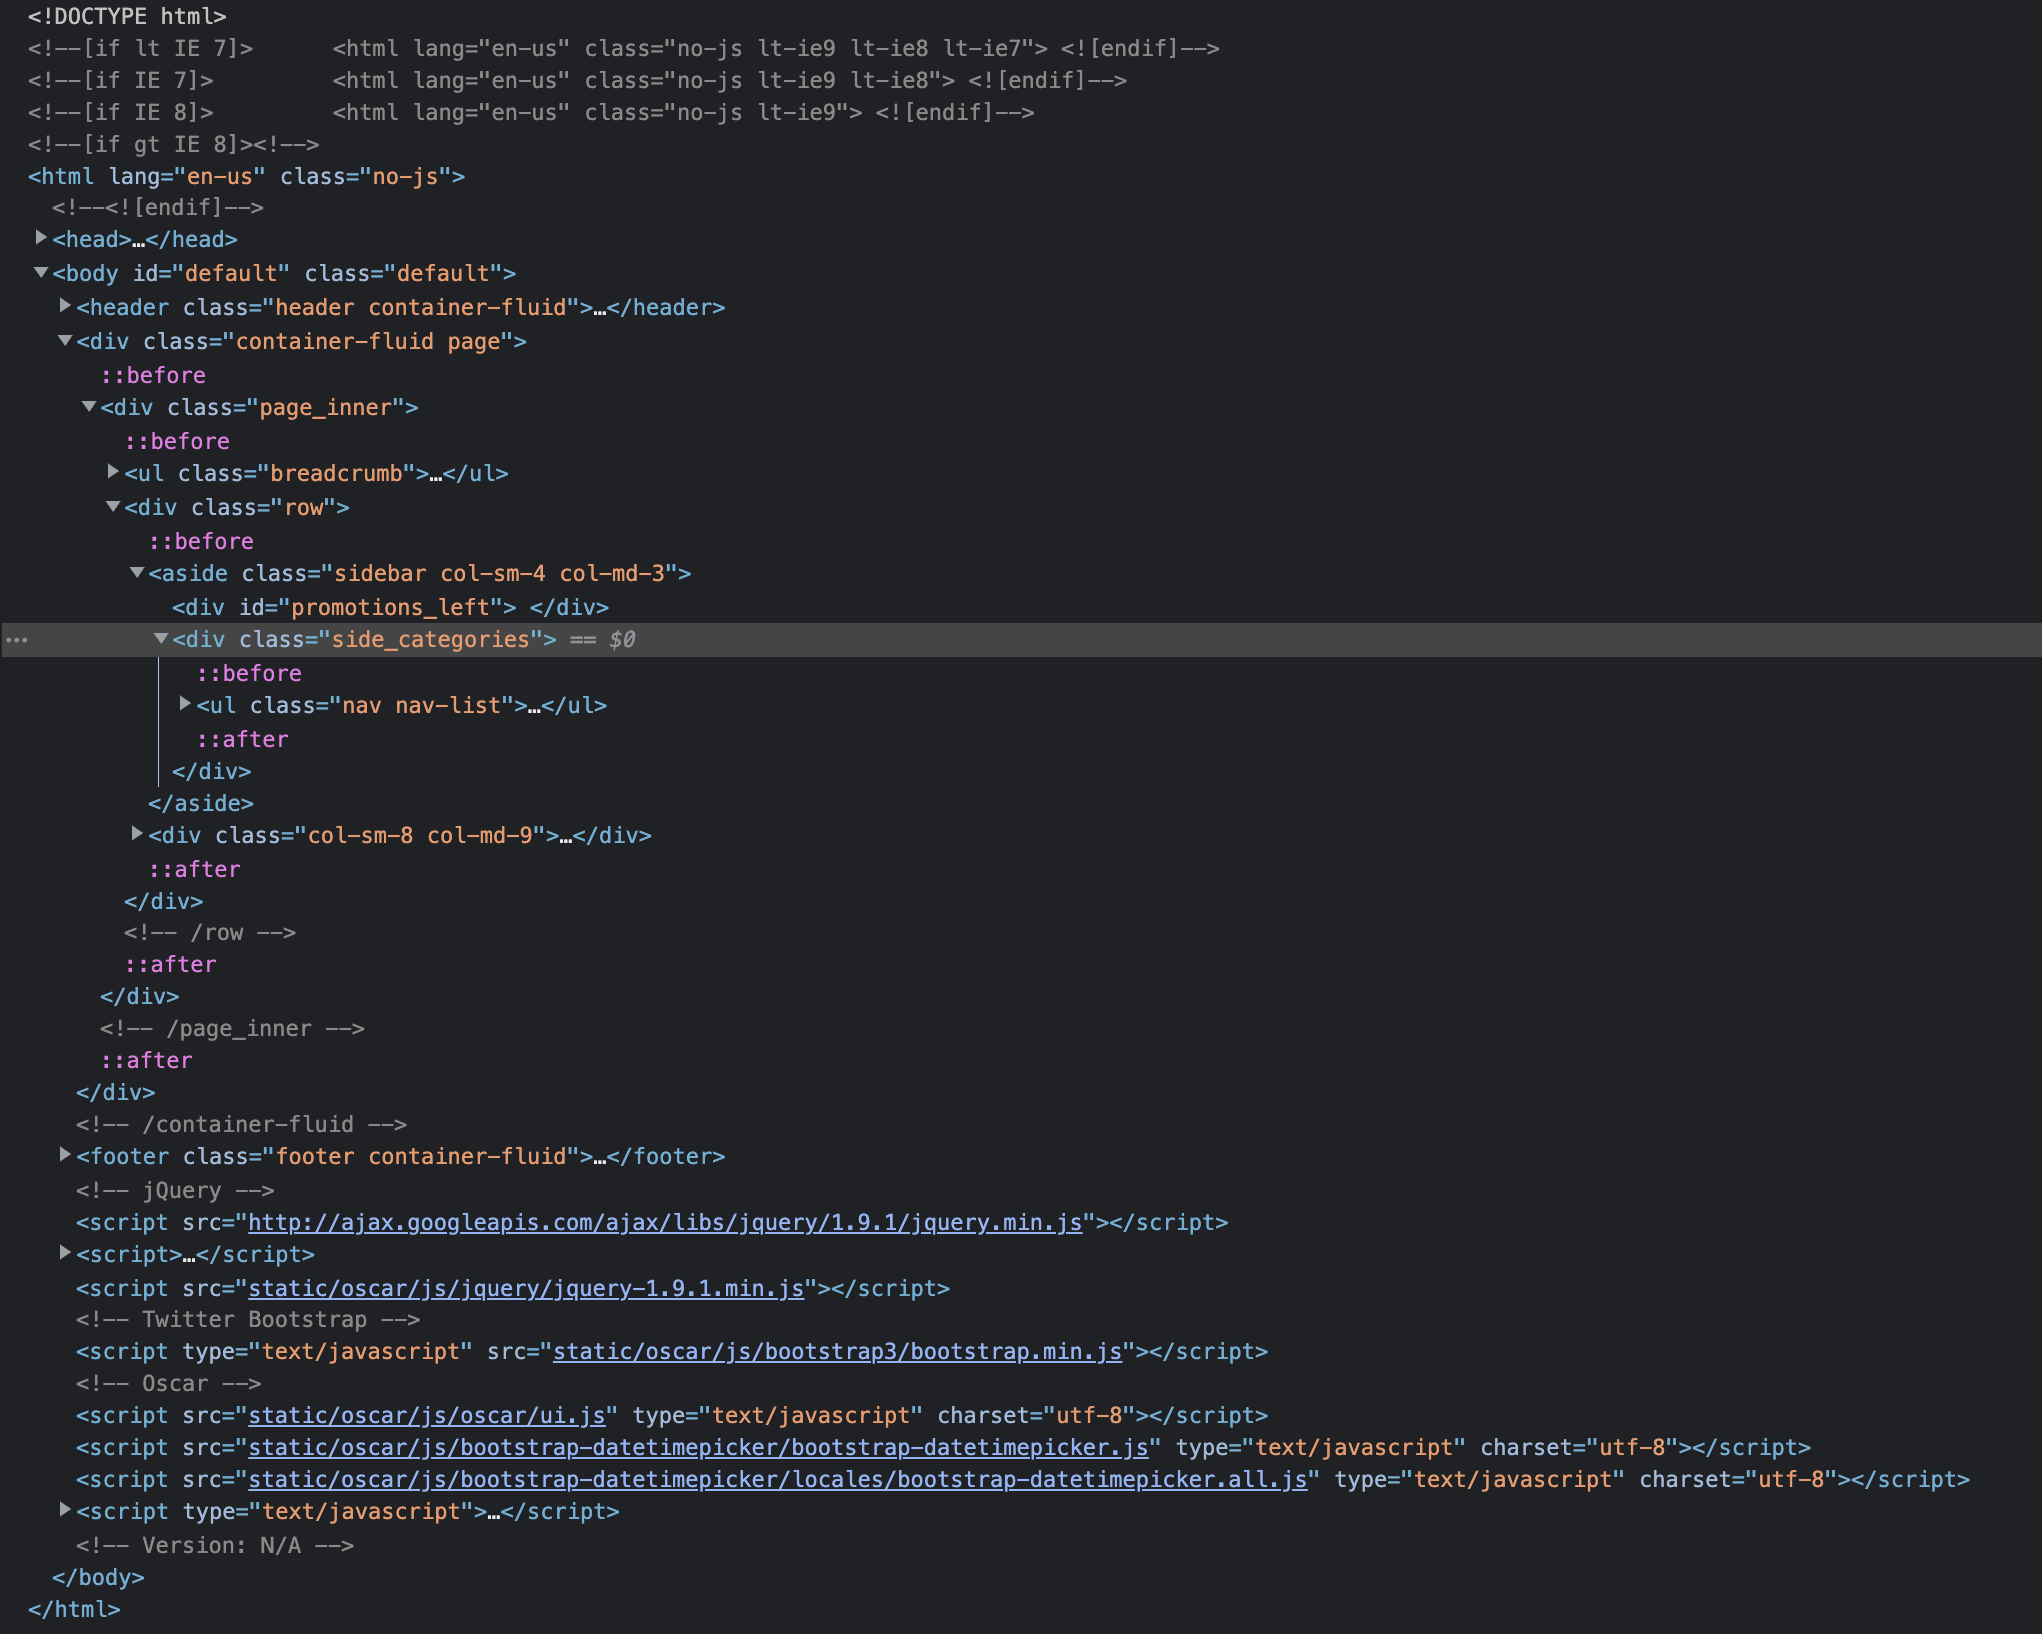

### PRO TIP 1: Encoding/Decoding Mismatch

Sometimes, particularly if you try to scrape a page which is non-English, you might get weird characters/symbols. That's because of an encoding/decoding mismatch. If that happens, you need to specify the __decoding method__:

- `utf-8` is usually used for most pages;
- if it's a western language, `latin-1` is another alternative
- [here](https://docs.python.org/3/library/codecs.html#standard-encodings) is a table summarizing all standard encodings. 

If you decide to use a specific encoding to retrieve/display a page, below is how you gonna do it.

In [ ]:
#### change `utf-8` to whatever encoding you want
from urllib.request import urlopen
page = urlopen(url).read().decode("utf-8")
soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

If you just want to look at the textual contents from `page`:

In [ ]:
print(soup.get_text())


Note that the table structure are lost when we try to print `page`? That's why we need to take a deeper look into it.

## Dissect the webpage for information

Looking at the page we try to scrape, there are different kind of information we can scrape from it:
- Eventually we would want the details of the books, like the _rating_, _title_, _price_, and _status_ (`"in stock"`);
  + however we noticed each book has its own page (if you click on the title - which is a hyperlink), and there are more information on the book's own page, so we may need that
- The books are in different categories, so what if we just need information about books from a specific category (e.g., `"Science Fiction"`)?
  + so we may need the links to different categories
- Another thing to look at is there are `1,000` books on the [page](https://books.toscrape.com/index.html), but what we get is only the first `20`.
  + so we need a technique called __pagination__.

### Scrape the categories/navigation bar

The categories sidebar on this [page](https://books.toscrape.com/index.html), can be found in a lot of different pages, in the form of a side bar, or a top navigation bar, usually its function is providing links to different sections of the website (webpages).

So it is important to scrape the side bar to retrieve such information. In order to do so, we need to investigate the page source code to locate where the side bar is.

__HINT__: side bars or navigation bars are usually a list (not a Python list), so we should look for the `<li>` tag.

Reminder: you should use "inspect" from Google Chrome, or similar functionalities from other browsers, to find the corresponding part of an element (e.g., side bar here) in the source code. With "inspect" enabled, just click on any of the link in the side bar, it will bring you to the location in the source code.

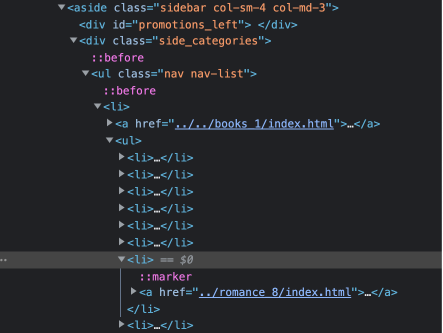

For instance, if I click on "Scince Fiction", one item in the source code is highlighted (as shown above). 

To get the specific link of "Scince Fiction", like the link below:
```html
<a href="../romance_8/index.html">Romance</a>
```
We actually need the parent (`<li>`). However, we either need all the categories, or even if we just need "Scince Fiction", the `<li>` tag is not __uniquely identifiable__. 

So we go to it parents, grand parents, ... until we find this line with has a `class` attribute:
```html
<ul class="nav nav-list"> ==$0
```



#### PRO TIPS
1. We always try to use attribute (e.g., `class`) and its value to __uniquely identify__ an element we want.
2. You should always go to the __lowest__ (grand)parent that can be __uniquely identified__;
3. Since this is a toy website, the value of `class` here (`nav nav-list`) is meaningful. A lot of the websites use randomized values in classes to make scraping harder. In that case, you will have to use the location of the element and inspect to determine.

If you want to get all occurrences of a tag (e.g., `<ul>`), you can use the `.find_all()` method like below.

In [ ]:
soup.find_all("ul")

Note that `.find_all()` always return a list of all occurrences, even if there is only one occurence. If you don't want a list you can use `.find()` instead, which returns the __first__ occurrence. 


However, as discussed above, we want a specific `<ul>` tag with the attribute as `"nav nav-list"`, so we should pass a dict (`{class:value}`) to `.find_all()` or `.find()`.

#### PRO TIP

We almosst always prefer `.find_all()` to `.find()` in case we missed some occurrnces. If it turns out you just need the first occurence, you can do:
```python
find_lst = soup.find_all("ul")
first_found = find_lst[0] ### also works if there is only one occurrence
```

In [ ]:
nav_bar = soup.find_all("ul", {"class":"nav nav-list"})
nav_bar

By observing the result above (`nav_bar`), we can see that it contains not only the navigation list we want, but also something else (e.g., the link to all the books). So we need to find the actual nav list from it.

We can see what we want is under another `<ul>` tag:

In [ ]:
nav_lst = nav_bar[0].find_all("ul")
nav_lst

Now every `<li>` tag in `nav_item` is an navigation element we want.

In [ ]:
#### I always like to break my loop when I first run it
#### So I can observe did I get what I want
 
for nav_item in nav_lst[0].find_all("li"):
  
  print(nav_item)
  break

<li>
<a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>
</li>


Now we can see two piece of information we need:
- `a.href`: the link to the category
- `text`, which is what is between the tags `<li>` and </li>`, which is the name of the category.

So we can store the results in a dict, where the **keys** are the names/categories, and the values are the links.

In [ ]:
#### use dict comprehension to save space
#### children of tag are attributes (`nav_item.a`)
#### and you can access its attribute(s) using the `.get()` method
#### noticing the excessive spaces and newlines around text
#### we use `.strip()` to remove them
cat_dict = {nav_item.text.strip():nav_item.a.get("href") for nav_item in nav_lst[0].find_all("li")}
cat_dict

{'Travel': 'catalogue/category/books/travel_2/index.html',
 'Mystery': 'catalogue/category/books/mystery_3/index.html',
 'Historical Fiction': 'catalogue/category/books/historical-fiction_4/index.html',
 'Sequential Art': 'catalogue/category/books/sequential-art_5/index.html',
 'Classics': 'catalogue/category/books/classics_6/index.html',
 'Philosophy': 'catalogue/category/books/philosophy_7/index.html',
 'Romance': 'catalogue/category/books/romance_8/index.html',
 'Womens Fiction': 'catalogue/category/books/womens-fiction_9/index.html',
 'Fiction': 'catalogue/category/books/fiction_10/index.html',
 'Childrens': 'catalogue/category/books/childrens_11/index.html',
 'Religion': 'catalogue/category/books/religion_12/index.html',
 'Nonfiction': 'catalogue/category/books/nonfiction_13/index.html',
 'Music': 'catalogue/category/books/music_14/index.html',
 'Default': 'catalogue/category/books/default_15/index.html',
 'Science Fiction': 'catalogue/category/books/science-fiction_16/index.html'

Note that the `link`s in `cat_dict` are partial (relative), we have to assemble it with the base url (`"https://books.toscrape.com/"`) to access the respective pages.

In [ ]:
base_url = "https://books.toscrape.com/"
base_url +"/"+ cat_dict['Travel']

'https://books.toscrape.com//catalogue/category/books/travel_2/index.html'

#### DO IT YOURSELF

1. Copy the link above in your browser's address bar to see if it opens the correct page;
2. Try to get the correct link to the __Science Fiction__ category yourself.

In [ ]:
#### Write your code here

base_url +"/"+ cat_dict['Science Fiction']

'https://books.toscrape.com//catalogue/category/books/science-fiction_16/index.html'

### Scrape the links to the book detail pages

Based on what we did with the navigation bar, we need to use the "inspect" functionality to find where each book's information is on the [main page](https://books.toscrape.com/catalogue/category/books_1/index.html). Through some tweaking, we found this section in the source code.

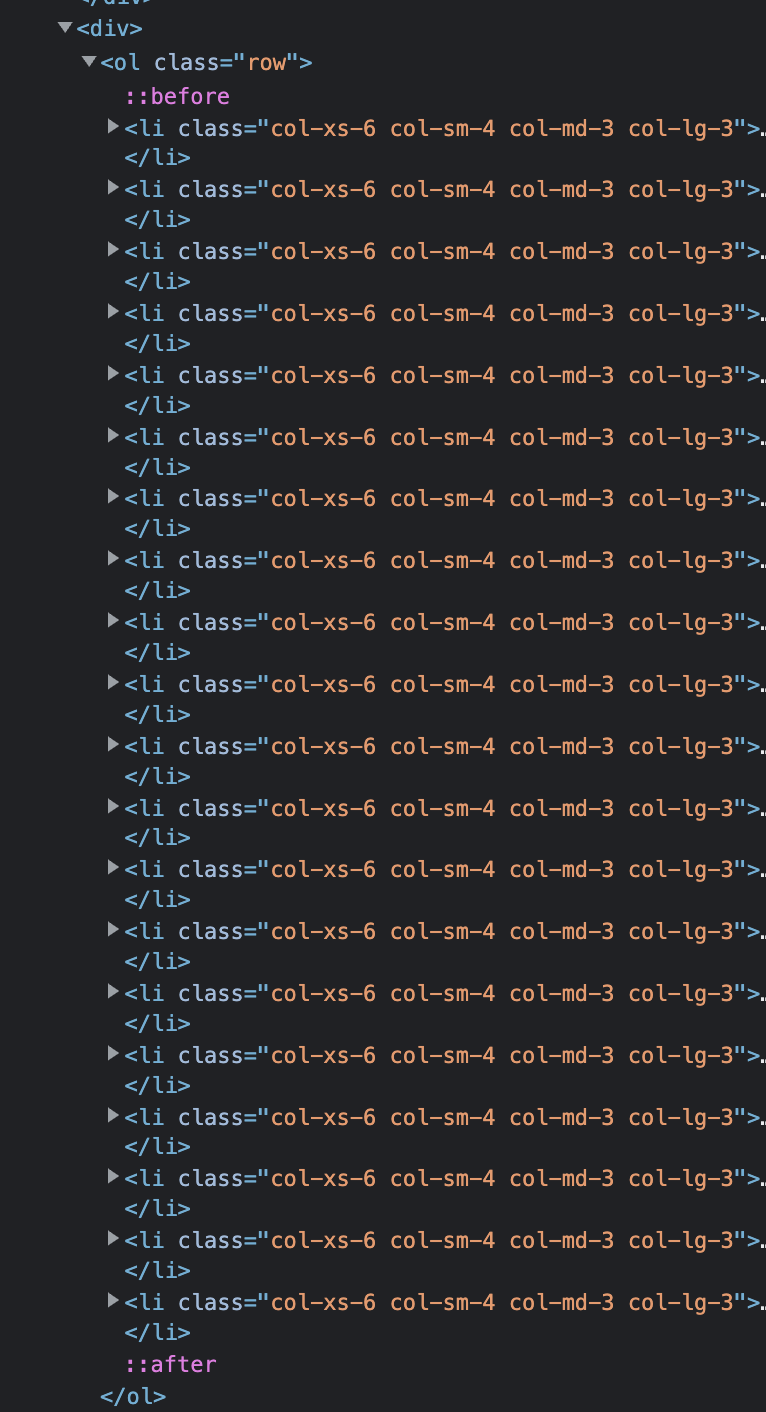

#### DO IT YOURSELF

Can you use the knowledge we had so far to programmatically retrieve the info we need? Just print out the info for the first book so we can examine the information we may need.


In [ ]:
#### write your code here
# for book_detail in soup.find("ol", {"class":"row"}).find_all("li"):
#   print(book_detail)
#   break

# soup.find_all('li')[0]

#Alternative is to use 'li' directly
soup.find_all('li', {'class':'col-xs-6 col-sm-4 col-md-3 col-lg-3'})[:3] #first three books

[<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>
 </li>, <li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
 <article class="product_pod">
 <div class="image_

In [ ]:
#@title SOLUTION 

soup.find("ol", {"class":"row"}).find_all("li")[0]


<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>
</li>

Via investigating the first book info above, we can find some information we may need:

- Title of the book
- Link to the book's detail page (below information can be found in the detail page as well)
  - Cover thumbnail
  - price
  - star rating
  - in stock ?




#### PRO TIP

If you can get the same information from the __main page__ and the __detail page__, always get it from the __main page__ since we can get them in batches (20 books) which is more efficient. Only resolve to the detail page for information you cannot get from the main.

Let's decode the above information we need using the code below, for the __first__ book.

In [ ]:
#### this is also common practice - testing your code on one
#### before you feed it to all of them in a loop
first_book = soup.find("ol", {"class":"row"}).find_all("li")[0]

first_book

<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>
</li>

To get the link to detail page:

In [ ]:
detail_link = first_book.a.get("href")
detail_link

'catalogue/a-light-in-the-attic_1000/index.html'

To get the title, we find that it is between a pair of `<h3></h3>` tags:

In [ ]:
#### first try
book_title = first_book.h3.text
book_title

'A Light in the ...'

Hmm... it's incomplete!

Via some investigation, maybe we should target the `title` attribute in the `<a>` tag:

In [ ]:
book_title = first_book.a
book_title

<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>

Hmm... that's not the `<a>` tag we wanted...

And we noticed the `<a>` we wanted is a child of `<h3>`. Trying again:

In [ ]:
book_title = first_book.h3.a.get("title")
book_title

'A Light in the Attic'

Try to get other information we need:

In [ ]:
#### get thumbnail
#### it's in a grandchild tag <img> 
#### under <div> with class as "image_container"
img_src = first_book.find("div", {"class": "image_container"}).a.img.get("src")
#### get rating 
rating0 = first_book.find('p').get('class')
#### it's in a <p> tag and the rating is the class
#### class contains two values and the second is what we want
rating = first_book.find("p").get("class")[0]
#### get price
#### it's in the text of a <p> tag with class as "price_color"
price = first_book.find("p", {"class": "price_color"}).get_text()
#### get in stock info
#### it's in the text of a <p> tag with class as "instock availability"
#### use `strip()` to get rid of excessive white spaces
in_stock = first_book.find("p", {"class": "availability"}).get_text().strip()
img_src, rating,rating0, price, in_stock

('media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'star-rating',
 ['star-rating', 'Three'],
 '£51.77',
 'In stock')

Looks we got all the information we need for the first book.

#### DO IT YOURSELF

Getting info about the first book is great, but how can we get the rest 19 books on this page as well?

Complete the code below to do that.

In [ ]:
page_info = []
for book in soup.find("ol", {"class":"row"}).find_all("li"):
  book_detail = {"title":"", "img_src":"", "rating":"", "price": "", "in_stock":"", "detail_link": ""}
  #### COMPLETE THE CODE BELOW
  book_detail['title'] = book.h3.a.get('title') ####FIXME
  book_detail['img_src'] =  book.find('div',{'class':'image_container'}).a.img.get('src') ####FIXME
  book_detail['rating'] = book.p.get('class')[1]####FIXME
  book_detail['price'] = book.find('div', {'class':'product_price'}).p.text ####FIXME
  book_detail['in_stock'] = book.find('p', {'class':'instock availability'}).get_text().strip() ####FIXME
  book_detail["detail_link"] = book.h3.a.get('href') ####FIXME
  page_info.append(book_detail)
# #### Showing the first book
# page_info[0]

page_info[0]





{'title': 'A Light in the Attic',
 'img_src': 'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'rating': 'Three',
 'price': '£51.77',
 'in_stock': 'In stock',
 'detail_link': 'catalogue/a-light-in-the-attic_1000/index.html'}

In [ ]:
#@title SOLUTION

page_info = []
for book in soup.find("ol", {"class":"row"}).find_all("li"):
  book_detail = {"title":"", "img_src":"", "rating":"", "price": "", "in_stock":"", "detail_link": ""}
  book_detail['title'] = book.h3.a.get("title")
  book_detail['img_src'] = book.find("div", {"class": "image_container"}).a.img.get("src")
  book_detail['rating'] = book.find("p").get("class")[1]
  book_detail['price'] = book.find("p", {"class": "price_color"}).get_text()
  book_detail['in_stock'] = book.find("p", {"class": "availability"}).get_text().strip()
  book_detail["detail_link"] = book.h3.a.get("href")
  page_info.append(book_detail)
#### Showing first book
page_info[1]


{'title': 'Tipping the Velvet',
 'img_src': 'media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg',
 'rating': 'One',
 'price': '£53.74',
 'in_stock': 'In stock',
 'detail_link': 'catalogue/tipping-the-velvet_999/index.html'}

In [ ]:
#### always good to test if you collected information 
#### about all 20 books on the first page
assert len(page_info) == 20

Now we can safely say to collected all the information we need from the first page, how about the other pages?

## Pagination

## Trick 1: Pagination

A lot websites use pagination (yeah it's a word), particularly if it contains a lot of contents. Sometimes like this:



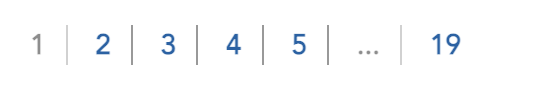



If you do not go through the pagination, you are only getting the record on the first/current page. So we need to go through the pagination to get the URLs for all the pages. 

However, on this particular website, the pages are not explicitly linked on each page, but they are linked via the __next__ button in the bottom right corner. 

If you play with the __next__ and then the __previous__ buttons a bit, you can find out the pages are with links as:
```html
https://books.toscrape.com/catalogue/category/books_1/page-1.html
https://books.toscrape.com/catalogue/category/books_1/page-2.html
...

```
So we can summarize that the page number is the only variable that changes in the links.

Only additional thing we would need is the total number of pages.

We can get it from either of the following methods:
1. There are a total of `1000` books, and each page shows 20 books, so it should be a total of `1000 // 20 = 50` pages;
2. At the center bottom of each page, it shows `Page X of 50`, where `X` denotes the current page and `50` is total number of pages.

We can try either method below.

In [ ]:
#### remember `soup` is first page now
#### the <strong> tag below <form> with attribte "method" 
#### of get contains the number we want
#### note that we need to convert it into integer
total_books = int(soup.find("form", {"method":"get"}).strong.text)
total_page = total_books // 20
total_page

50

In [ ]:
#### text "Page X of 50" is in a <ul> tag
#### with attribute "class" of pager
#### and the <li> tag under it with
#### attribute "class" of "current"

total_page = int(soup.find("li", {"class":"current"}).text.strip().split("of")[1])
total_page

50

Now we can define a function to get different pages.

In [ ]:
url_temp = "https://books.toscrape.com/catalogue/category/books_1/page-{}.html"
def get_page(soup):
  #### method 1
  # total_books = int(soup.find("form", {"method":"get"}).strong.text)
  # total_page = total_books // 20
  #### method 2
  total_page = int(soup.find("li", {"class":"current"}).text.strip().split("of")[1])
  return [url_temp.format(page) for page in range(1, total_page+1)]
  
   
  


In [ ]:
all_pages = get_page(soup)
all_pages

['https://books.toscrape.com/catalogue/category/books_1/page-1.html',
 'https://books.toscrape.com/catalogue/category/books_1/page-2.html',
 'https://books.toscrape.com/catalogue/category/books_1/page-3.html',
 'https://books.toscrape.com/catalogue/category/books_1/page-4.html',
 'https://books.toscrape.com/catalogue/category/books_1/page-5.html',
 'https://books.toscrape.com/catalogue/category/books_1/page-6.html',
 'https://books.toscrape.com/catalogue/category/books_1/page-7.html',
 'https://books.toscrape.com/catalogue/category/books_1/page-8.html',
 'https://books.toscrape.com/catalogue/category/books_1/page-9.html',
 'https://books.toscrape.com/catalogue/category/books_1/page-10.html',
 'https://books.toscrape.com/catalogue/category/books_1/page-11.html',
 'https://books.toscrape.com/catalogue/category/books_1/page-12.html',
 'https://books.toscrape.com/catalogue/category/books_1/page-13.html',
 'https://books.toscrape.com/catalogue/category/books_1/page-14.html',
 'https://books

You can click on any link above to see if that leads to the correct page.

__NOTE__: `soup` is the input of the function `get_page()`, so we need to parse the first page. We can incorporate that parsing into the `get_page()` function if we want.

## Get book detail page

We said before that we can get more information from the book details page, such as:
- Amount available in stock (`0` if not in stock)
- Product discription
- Product information, such as:
  + UPC
  + Product Type
  + Price including Tax & Tax
  + number of reviews

Now let's try to get the details of the first book from the first page, to show you the process.

In [ ]:
#### get the first books overall info from `page_info`
page_info[0]

{'title': 'A Light in the Attic',
 'img_src': 'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'rating': 'Three',
 'price': '£51.77',
 'in_stock': 'In stock',
 'detail_link': 'catalogue/a-light-in-the-attic_1000/index.html'}

Let's assemble the link to the detail page first.

In [ ]:
detail_link_1 = base_url + "/" + page_info[0]['detail_link']
detail_link_1

'https://books.toscrape.com//catalogue/a-light-in-the-attic_1000/index.html'

Now we can use `detail_link_1` to get the book detail page we wanted.

In [ ]:
detail_soup = BeautifulSoup(requests.get(detail_link_1).text, "html.parser")
print(detail_soup.prettify())

NameError: ignored

Looks like we are getting the page we wanted.

#### PRO TIP:

When you try to retrieve a page in a loop, or a function, in the spirit of defensive coding, you should always test if you are getting the page you want. Something like:
```python
for link in links:
  page = requests.get(link)
  if page:
    #### continue doing what you want to do
  else:
    print(page.reason) ### you want to know why you cannot get the page
    pass
```

Once we get the detail page, getting information from it is not too hard.

In [ ]:
#### get product discription
#### since the <p> tag containing the product description has no identifier
#### we had to start from its sibling <div> with attribute "id" as "product description"
#### then move on to the siblings (same level in the tree)
prod_desc = detail_soup.find("div", {"id": "product_description"}).next_sibling.next_sibling
prod_desc

<p>It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never soun

In [ ]:
#### get product information table
prod_table = detail_soup.find("table", {"class":"table table-striped"})
prod_table

<table class="table table-striped">
<tr>
<th>UPC</th><td>a897fe39b1053632</td>
</tr>
<tr>
<th>Product Type</th><td>Books</td>
</tr>
<tr>
<th>Price (excl. tax)</th><td>Â£51.77</td>
</tr>
<tr>
<th>Price (incl. tax)</th><td>Â£51.77</td>
</tr>
<tr>
<th>Tax</th><td>Â£0.00</td>
</tr>
<tr>
<th>Availability</th>
<td>In stock (22 available)</td>
</tr>
<tr>
<th>Number of reviews</th>
<td>0</td>
</tr>
</table>

Every row in `prod_table` contains the key and value, so we can have a dict for that.

In [ ]:
prod_info = {}
for row in detail_soup.find("table", {"class":"table table-striped"}).find_all("tr"):
  #### key in row.th.text and value in row.td.text
  # print(row.th.text, row.td.text)
  prod_info[row.th.text] = row.td.text
prod_info

{'UPC': 'a897fe39b1053632',
 'Product Type': 'Books',
 'Price (excl. tax)': 'Â£51.77',
 'Price (incl. tax)': 'Â£51.77',
 'Tax': 'Â£0.00',
 'Availability': 'In stock (22 available)',
 'Number of reviews': '0'}

However, we might want to add the title to `prod_info` so later on we can merge it with what we scraped from the pages.

In [ ]:
prod_info["Title"] = detail_soup.find("div", {"class":"col-sm-6 product_main"}).h1.text
prod_info

{'UPC': 'a897fe39b1053632',
 'Product Type': 'Books',
 'Price (excl. tax)': 'Â£51.77',
 'Price (incl. tax)': 'Â£51.77',
 'Tax': 'Â£0.00',
 'Availability': 'In stock (22 available)',
 'Number of reviews': '0',
 'Title': 'A Light in the Attic'}

Now we can try to get all the detailed info for all the books on page 1.

In [ ]:
all_details = []
for book in page_info:
  # print(book)
  link = base_url + "/" + book['detail_link']
  page = requests.get(link)
  if page:
    detail_soup = BeautifulSoup(page.text, "html.parser")
    detail_dict = {}
    detail_dict["prod_desc"] = detail_soup.find("div", {"id": "product_description"}).next_sibling.next_sibling
    prod_table = detail_soup.find("table", {"class":"table table-striped"})
    prod_info = {}
    for row in detail_soup.find("table", {"class":"table table-striped"}).find_all("tr"):
      #### key in row.th.text and value in row.td.text
      # print(row.th.text, row.td.text)
      prod_info[row.th.text] = row.td.text
    prod_info["Title"] = detail_soup.find("div", {"class":"col-sm-6 product_main"}).h1.text
    all_details.append(prod_info)
  else:
    print("{} cannot be retrieved because of".format(link, page.reason))
  # break
all_details

NameError: ignored

In [ ]:
assert len(all_details) == len(page_info)

Since the two dicts are of the same books, we can merge them to get it more concise.

In [ ]:
for book_detail in all_details:
  for book in page_info:
    if book_detail["Title"] == book["title"]:
      book_detail.update(book)
all_details[1]

{'UPC': '90fa61229261140a',
 'Product Type': 'Books',
 'Price (excl. tax)': 'Â£53.74',
 'Price (incl. tax)': 'Â£53.74',
 'Tax': 'Â£0.00',
 'Availability': 'In stock (20 available)',
 'Number of reviews': '0',
 'Title': 'Tipping the Velvet',
 'title': 'Tipping the Velvet',
 'img_src': 'media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg',
 'rating': 'One',
 'price': '£53.74',
 'in_stock': 'In stock',
 'detail_link': 'catalogue/tipping-the-velvet_999/index.html'}

Think we have demostrate how to scrape useful information from a website. Make sure you save all extracted information in a file, like below:

```python
import pickle
#### change "path/to/file" to the path and file name you want to save it
#### in your google drive
with open("path/to/file", "w") as pickle_file:
  pickle.dump(all_details, pickle_file)
  #### if you want you can save other info as well
  #### like pages, or cat_dict

```

If you want to load it for later use, you can:

```python
import pickle

with open("path/to/file", "w") as pickle_file:
  all_details = pickle.load(pickle_file)
```

Later when we learn about `pandas`, you will find it much easier to save things as `pandas.DataFrame`.

# CODING ASSIGNMENT PART 1A

1. Use what you learned above, scrape all the book details from page 36 - 42 from the website.
2. Use what you learned above, scrape all the book details from categories `romance` and `science fiction`.

Notes:
1. Use functions when you can
2. Properly comments your code
3. Implement defensive coding and docstrings when you can

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#Main page url
url = 'https://books.toscrape.com/index.html'

pages = 'https://books.toscrape.com/catalogue/category/books_1/page-{}.html'


response = requests.get(url)
response

soup = BeautifulSoup(response.text, 'html.parser')

print(soup.prettify)




<bound method Tag.prettify of <!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" t

In [ ]:
def rangepages(soup, start, end): 
  '''
  Iterates through a range of pages by replacing the page number in the url 
  with each iteration
  '''


  return [soup.format(page) for page in range(start, end+1)]




rangepages(pages, 36, 42)[0] #Will print the links for pages 36-42


'https://books.toscrape.com/catalogue/category/books_1/page-36.html'

In [ ]:
#gets details of each book in the range of indicated in the rangepages function

def get_summary():
     
  page_info = []
  for page in range(7):
    url = rangepages(pages, 36, 42)[page]
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

     
  
  
    for book in soup.find("ol", {"class":"row"}).find_all("li"):
      book_detail = {"title":"", "img_src":"", "rating":"", "price": "", "in_stock":"", "detail_link": ""}
      book_detail['title'] = book.h3.a.get("title")
      book_detail['img_src'] = book.find("div", {"class": "image_container"}).a.img.get("src")
      book_detail['rating'] = book.find("p").get("class")[1]
      book_detail['price'] = book.find("p", {"class": "price_color"}).get_text()
      book_detail['in_stock'] = book.find("p", {"class": "availability"}).get_text().strip()
      book_detail["detail_link"] = book.h3.a.get("href")
      page_info.append(book_detail)

  return page_info


get_summary()

df = pd.DataFrame(get_summary())

#prints dataframe of all books in the range of pages 36-42
df.head(140)

,title,img_src,rating,price,in_stock,detail_link
0,Walk the Edge (Thunder Road #2),../../../media/cache/61/2c/612ce7fa4cbee472392...,Three,Â£32.36,In stock,../../walk-the-edge-thunder-road-2_300/index.html
1,Voyager (Outlander #3),../../../media/cache/b5/d8/b5d813da01f2ccd7bcf...,Five,Â£21.07,In stock,../../voyager-outlander-3_299/index.html
2,Very Good Lives: The Fringe Benefits of Failur...,../../../media/cache/ab/ac/abac4222af5cc296b70...,Three,Â£50.66,In stock,../../very-good-lives-the-fringe-benefits-of-f...
3,Vegan Vegetarian Omnivore: Dinner for Everyone...,../../../media/cache/80/63/80631f8bca036361343...,Two,Â£13.66,In stock,../../vegan-vegetarian-omnivore-dinner-for-eve...
4,"Unstuffed: Decluttering Your Home, Mind, and Soul",../../../media/cache/14/07/1407c2d6318956b10ab...,One,Â£58.09,In stock,../../unstuffed-decluttering-your-home-mind-an...
...,...,...,...,...,...,...
135,Green Eggs and Ham (Beginner Books B-16),../../../media/cache/3a/0e/3a0e75e4f758f90a809...,Four,Â£10.79,In stock,../../green-eggs-and-ham-beginner-books-b-16_1...
136,"Grayson, Vol 3: Nemesis (Grayson #3)",../../../media/cache/f9/4c/f94cfc3c82abb799568...,One,Â£42.72,In stock,../../grayson-vol-3-nemesis-grayson-3_164/inde...
137,Gratitude,../../../media/cache/07/b6/07b673e7d367a5e8941...,Five,Â£26.66,In stock,../../gratitude_163/index.html
138,Gone Girl,../../../media/cache/24/ad/24ad42075b1aa1403ae...,Five,Â£37.60,In stock,../../gone-girl_162/index.html


In [ ]:
#2 soups for each genre

url2 = 'https://books.toscrape.com/catalogue/category/books/science-fiction_16/index.html'

url3 = 'https://books.toscrape.com/catalogue/category/books/romance_8/index.html'

response2 = requests.get(url2)

response3 = requests.get(url3)

scifi = BeautifulSoup(response2.text, 'html.parser')

romance = BeautifulSoup(response3.text, 'html.parser')




#for aggregating a dict for each book
sflst = [] 

# for book_detail in scifi.find("ol", {"class":"row"}).find_all("li"):
#   print(book_detail)

# for book_detail in romance.find("ol", {"class":"row"}).find_all("li"):
#   print(book_detail)

for book in scifi.find_all('li', {'class':'col-xs-6 col-sm-4 col-md-3 col-lg-3'}):
  #setting dict keys
  details = {"title":"", "img_src":"", "rating":"", "price": "", "in_stock":"", "detail_link": ""} 

  #Assigning values to each key
  details['title'] = book.h3.text
  details['img_src'] = book.find("div", {"class":"image_container"}).a.img.get("src")
  details['rating'] = book.p.get('class')[1]
  details['price'] = book.find('p', {'class': 'price_color'}).text[1:]
  details['in_stock'] = book.find('p', {'class':'instock availability'}).text.strip()
  details['detail_link'] = book.h3.a.get('href')
  details['genre'] = book.find('div', {"class":'image_container'}).find('href')               
  sflst.append(details)

#romance loop
for book in romance.find_all('li', {'class':'col-xs-6 col-sm-4 col-md-3 col-lg-3'}):
  #setting dict keys
  rdetails = {"title":"", "img_src":"", "rating":"", "price": "", "in_stock":"", "detail_link": ""} 

  #Assigning values to each key
  rdetails['title'] = book.h3.text
  rdetails['img_src'] = book.find("div", {"class":"image_container"}).a.img.get("src")
  rdetails['rating'] = book.p.get('class')[1]
  rdetails['price'] = book.find('p', {'class': 'price_color'}).text[1:]
  rdetails['in_stock'] = book.find('p', {'class':'instock availability'}).text.strip()
  rdetails['detail_link'] = book.h3.a.get('href')
  rdetails['genre'] = book.find('div', {"class":'image_container'}).find('href')               
  sflst.append(rdetails)

#Testing
# details['title']
# details['img_src']
# details['rating']
# details['price']
# details['in_stock']
# details['detail_link']

#Easier to show it all in a dataframe

df = pd.DataFrame(sflst)
#Print DF of romance and science fiction details
df


,title,img_src,rating,price,in_stock,detail_link,genre
0,Mesaerion: The Best Science ...,../../../../media/cache/09/a3/09a3aef48557576e...,One,£37.59,In stock,../../../mesaerion-the-best-science-fiction-st...,None
1,Join,../../../../media/cache/93/63/9363f0065fbad568...,Five,£35.67,In stock,../../../join_902/index.html,None
2,William Shakespeare's Star Wars: ...,../../../../media/cache/02/37/0237b445efc18c55...,Four,£43.30,In stock,../../../william-shakespeares-star-wars-verily...,None
3,The Project,../../../../media/cache/10/6e/106e2fc7160712ed...,One,£10.65,In stock,../../../the-project_856/index.html,None
4,Soft Apocalypse,../../../../media/cache/f0/06/f0060c756556b855...,Two,£26.12,In stock,../../../soft-apocalypse_833/index.html,None
5,Sleeping Giants (Themis Files ...,../../../../media/cache/c0/72/c072c1ef144d571a...,One,£48.74,In stock,../../../sleeping-giants-themis-files-1_604/in...,None
6,Arena,../../../../media/cache/51/88/518810d182843244...,Four,£21.36,In stock,../../../arena_587/index.html,None
7,Foundation (Foundation (Publication Order) ...,../../../../media/cache/8b/92/8b9267df86378b69...,One,£32.42,In stock,../../../foundation-foundation-publication-ord...,None
8,The Restaurant at the ...,../../../../media/cache/b8/b2/b8b2956acc758a38...,One,£10.92,In stock,../../../the-restaurant-at-the-end-of-the-univ...,None
9,Ready Player One,../../../../media/cache/51/34/513418bd1c6114f3...,Four,£19.07,In stock,../../../ready-player-one_209/index.html,None


# What if a website cannot be directly scraped?

Sometimes you might get contents like below when you try to scrape a website:
```html
<html style="height:100%">
 <head>
  <meta content="NOINDEX, NOFOLLOW" name="ROBOTS"/>
  <meta content="telephone=no" name="format-detection"/>
  <meta content="initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <script src="/_Incapsula_Resource?SWJIYLWA=719d34d31c8e3a6e6fffd425f7e032f3" type="text/javascript">
  </script>
  <script async="" src="/way-All-which-sitie-word-trone-How-will-to-our-h">
  </script>
 </head>
 <body style="margin:0px;height:100%">
  <iframe frameborder="0" height="100%" id="main-iframe" marginheight="0px" marginwidth="0px" src="/_Incapsula_Resource?SWUDNSAI=31&amp;xinfo=11-28381721-0%20NNNN%20RT%281645301698988%2017%29%20q%280%20-1%20-1%206%29%20r%280%20-1%29%20B12%2814%2c0%2c0%29%20U18&amp;incident_id=1349000430059696342-122427282651679435&amp;edet=12&amp;cinfo=0e0000006ed7&amp;rpinfo=0&amp;cts=2lkThfTc52WCYtU9oC2cAwvX%2feTmEAonnK6e%2fRQt%2fOY%2bCKeK7m9l%2bS7ilKmPr6wG&amp;mth=GET" width="100%">
   Request unsuccessful. Incapsula incident ID: 1349000430059696342-122427282651679435
  </iframe>
 </body>
</html>
```

This is because this website use a service called **Incapsula** to detect any BOT. In other words, this means the website send you a message saying *DO NOT SCRAPE!*

**WARNING ZONE**

It is totally okay if you decide to move to an alternative data source. But if you decide to proceed with this one (you might have to take the responsibility for doing so), you can always *disguise* that we are NOT a BOT:
```python
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers = headers)
```

__NOTE__: 
1. the `header` method may not work if they use heavier defense.
2. if the website has such mechanism, usually it does not want to be scaraped, so __PROCEED AT YOUR OWN RISK__.